# kNN

### Визуализация решающих поверхностей в kNN

Для изображения решающей поверхности классификатора kNN используется встроенный в `sklearn` набор данных `wine`, содержащий информацию о характеристиках трёх видов вина. Описание набора [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_wine
# загрузка данных
data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


Проверим набор данных на пропущенные значения, если они есть, то необходимо удалить их. Также следует проверить наличие в наборе данных категориальных переменных (закодируем с [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)).

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from numpy import nan

In [ ]:
# проверка на пропуски
print("Пропущенные значения в наборе данных:", 'есть' if X.isnull().any().any() else 'нет')
print("Пропущенные значения в целевой переменной:", 'есть' if np.any(np.isnan(y)) else 'нет')

# удаление пропусков
X.dropna(inplace=True)
pd.DataFrame(y).dropna().to_numpy

# создаение маски, указывающую на столбцы с категориальными признаками
cat_features_mask = (X.dtypes == "object").values
print("Категориальные переменные в наборе данных:", 'есть' if cat_features_mask.any() else 'нет')

Пропущенные значения в наборе данных: нет
Пропущенные значения в целевой переменной: нет
Категориальные переменные в наборе данных: нет


Используя функцию `train_test_split()`, разделим выборку на тренировочную и тестовую. Кроме того, т.к. разбиение осуществляется случайным образом, зафиксируем `np.random.seed()` для воспроизводимости результатов.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# фиксация для воспроизводимости результатов
np.random.seed(27)

# разделение выборки на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=27)

Важно использовать аргумент stratify при разбиении для равного распределения данных и предотвращения смещения выборки. Доминирования данных одной группы в обучении модели может привести к плохим результатам.

На тренировочной выборке обучим шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставим равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25. Для обучения используем только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Будем масштабировать признаки при помощи модуля `StandardScaler`.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
# масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['alcohol', 'magnesium']])
X_test_scaled = pd.DataFrame(scaler.transform(X_test[['alcohol', 'magnesium']]))

In [ ]:
# обучение шести классификаторов kNN
neighbours = [1, 3, 5, 10, 15, 25]
clfs = [KNeighborsClassifier(n_neighbors=neighbour, p=2, metric='euclidean') for neighbour in neighbours]
fits = [clf.fit(X_train_scaled, y_train) for clf in clfs]
predicts = [(clf.predict(X_train_scaled), clf.predict(X_test_scaled)) for clf in clfs]

# доля правильных ответов на тренировочной и тестовой выборках для каждого классификатора
accuracies = pd.DataFrame({'NN': neighbours, 'Train': [accuracy_score(y_train, predict[0]) for predict in predicts], 'Test': [accuracy_score(y_test, predict[1]) for predict in predicts]})
display(accuracies)

,NN,Train,Test
0,1,0.991935,0.703704
1,3,0.806452,0.685185
2,5,0.790323,0.685185
3,10,0.758065,0.722222
4,15,0.733871,0.740741
5,25,0.750000,0.703704


С помощью библиотеки `mlxtend` визуализируем решающие поверхности обученных классификаторов.

In [ ]:
!pip install mlxtend

In [ ]:
import mlxtend

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

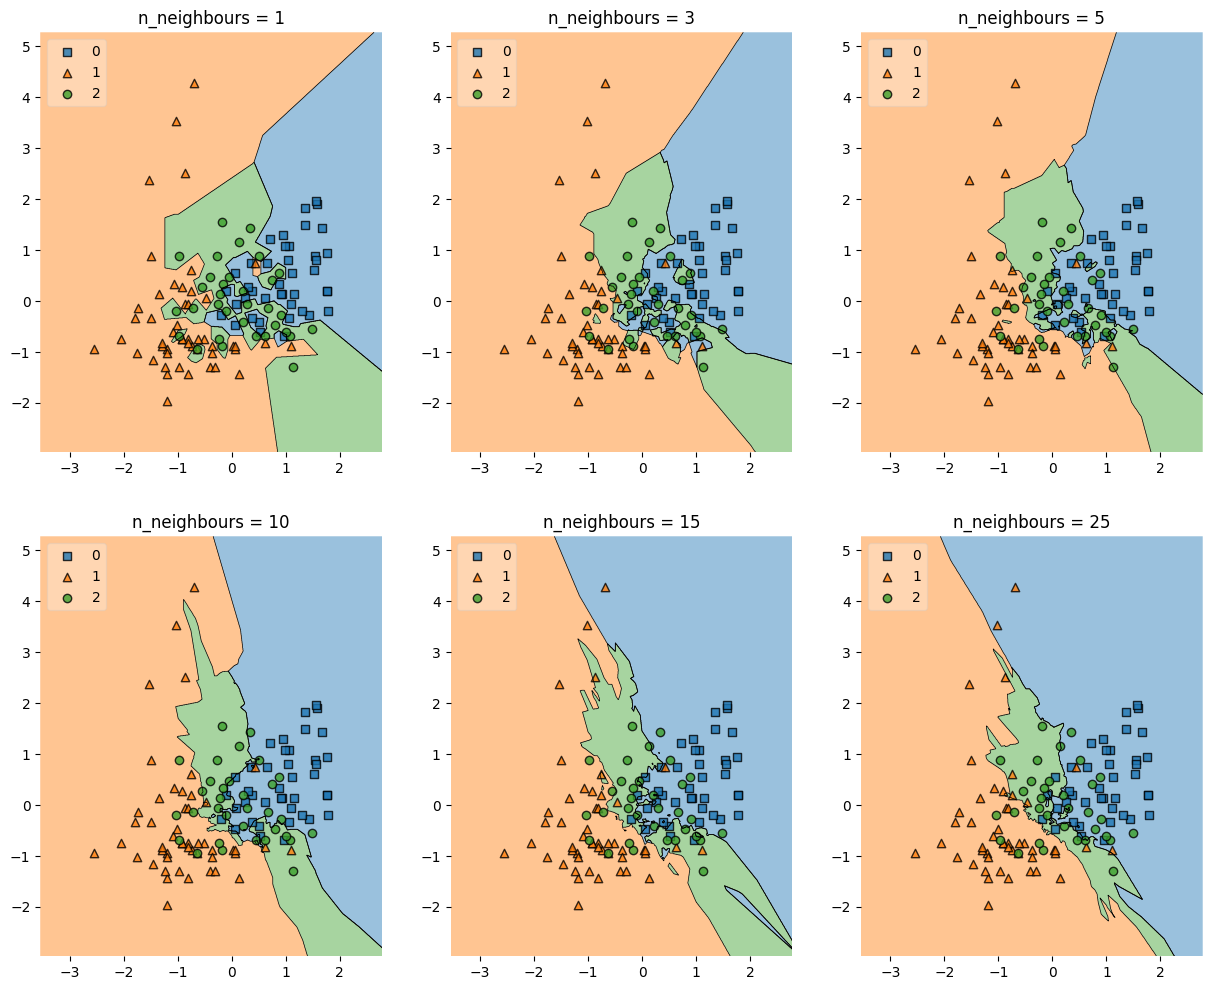

In [ ]:
# визуализация решающих поверхностей
gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(15, 12))
labels = [f'n_neighbours = {i}' for i in neighbours]

for clf, fit, lab, grd in zip(clfs, fits, labels, itertools.product(range(2), range(3))):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_scaled, y = y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

Из результатов, полученных в задаче 1.3, можно заметить, что с увеличением числа соседей точность на обучающей выборке сначала увеличивается, достигая максимума при k=25, а затем снижается. На тестовой выборке точность сначала снижается, затем незначительно возрастает и снова снижается. Так, при малом числе соседей модель еще не может эффективно обобщать данные, а при большом количестве соседей модель уже начинает переобучаться. Для обучения классификатора оптимально использовать k=10, т.к. при этом значении достигается наилучшее соотношение между точностью на обучающей и тестовой выборках.

 Из результатов, полученных в задаче 1.5, можно заметить, что решающие поверхности для k=5 и k=10 наиболее "гладкие" и способные обеспечивать хорошую обобщающую способность, но не слишком сложные, что хорошо, т.к. более сложные поверхности могут приводить к переобучению модели.

 Таким образом, оптимально использовать k=10 для обучения классификатора.

 Что касается переобучения модели, результаты обоих задания для k=3 явно говорят о ней, т.к. в 1.3 модель показывает высокую точность на тренировочных данных и низкую на тестовых, а в 1.5 решающая поверхность имеет сложную структуру, все это указывает на то, что модель, скорее, адаптируется для обучающей выборки, а не обобщает данные.

### Самостоятельная реализация KNN

Попробуем сделать KNN для классификации.

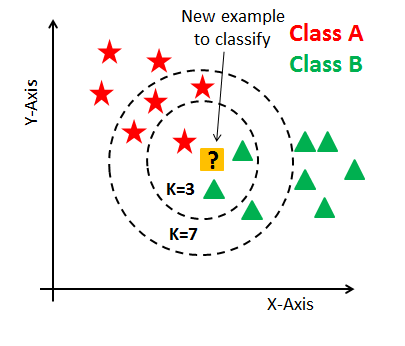

In [ ]:
import math
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        return np.array([Counter([self.y_train[i] for i in np.argsort([self.count_distance(x, neighbour) for neighbour in self.X_train])[:self.k]]).most_common(1)[0][0] for x in X])

    def count_distance(self, x, y):
        return np.sqrt(np.sum((x - y)**2))

In [ ]:
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
test_knn(KNN)

Будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

In [ ]:
# выделение целевой переменной
y = data['price']

In [ ]:
# в наборе данных есть признаки, не несущие дополнительной информации
data = data.drop(data.columns[0], axis=1) # удалим первый столбец - в датафрейме есть index
display(data)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
# проверка на пропуски
print("Пропущенные значения в наборе данных:", 'есть' if data.isna().any().any() else 'нет')

# удаление пропусков
data.dropna(inplace=True)

Пропущенные значения в наборе данных: нет


Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Выведем матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

In [ ]:
# выборочные корреляции между всеми вещественными признаками и целевой переменной
data[data.columns[(data.dtypes == "object").values==False]].corr()['price']

carat    0.921591
depth   -0.010647
table    0.127134
price    1.000000
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64

 Такие признаки, как carat и размеры x, y, z коррелируют с целевой переменной больше всего. Это логично, что стоимость бриллианта зависит от его размера и количества карат.

Так как линейная модель складывает значения признаков с некоторыми весами,  нужно аккуратно обработать категориальные признаки.

In [ ]:
# OneHot-кодирование
data_dum = pd.get_dummies(data, drop_first=True)
data_dum.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
# фиксация для воспроизводимости результатов
np.random.seed(27)

# разделение выборки на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(data_dum.drop('price', axis=1), y, test_size=0.3, random_state=27)

In [ ]:
# масштабирование признаков
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train_scaled, y_train)

print(f"Среднеквадратическая ошибка линейной регрессии на тренировочной выборке: {mean_squared_error(y_train, lr.predict(X_train_scaled))}")
print(f"Среднеквадратическая ошибка линейной регрессии на тестовой выборке: {mean_squared_error(y_test, lr.predict(X_test_scaled))}")

Среднеквадратическая ошибка линейной регрессии на тренировочной выборке: 1262227.0664484433
Среднеквадратическая ошибка линейной регрессии на тестовой выборке: 1313773.3588004597


In [ ]:
# оценки всех коэффициентов
coefs = [(name, coeff) for (name, coeff) in zip(X_train.columns, lr.coef_)]
print(*coefs, sep='\n')

('carat', 5451.678129401825)
('depth', -100.44085930121526)
('table', -64.66261752068775)
('x', -1340.707206867921)
('y', 141.159232540085)
('z', -62.38568309293664)
('cut_Good', 169.5955469997578)
('cut_Ideal', 413.8143009546437)
('cut_Premium', 342.6071510188032)
('cut_Very Good', 309.6420162886026)
('color_E', -87.48857849789067)
('color_F', -106.74182493712868)
('color_G', -206.72681339257173)
('color_H', -364.7311499604684)
('color_I', -450.23592225619524)
('color_J', -531.1769891113964)
('clarity_IF', 977.0033576387253)
('clarity_SI1', 1594.8432849159017)
('clarity_SI2', 1030.760943464876)
('clarity_VS1', 1663.3291869432026)
('clarity_VS2', 1818.1174497174343)
('clarity_VVS1', 1278.4302318984678)
('clarity_VVS2', 1471.4859088658868)


Среди вещественных переменных ('carat'= 5451,
'depth'= -100,
'table'= -64,
'x'= -1340,
'y'= 141,
'z' = -62) выделяются такие признаки, как 'carat' и 'x', т.к. их оценки коэффициентов по модулю на порядок превышают оценки прочих вещественных переменных.

#### Lasso- и Ridge-регрессии

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [ ]:
# Lasso-регрессия
lasso = Lasso(alpha=10).fit(X_train_scaled, y_train)

print(f"MSE (Train_lasso): {mean_squared_error(y_train, lasso.predict(X_train_scaled))}")
print(f"MSE (Test_lasso): {mean_squared_error(y_test, lasso.predict(X_test_scaled))}\n")

# Ridge-регрессия
ridge = Ridge(alpha=10).fit(X_train_scaled, y_train)

print(f"MSE (Train_ridge): {mean_squared_error(y_train, ridge.predict(X_train_scaled))}")
print(f"MSE (Test_ridge): {mean_squared_error(y_test, ridge.predict(X_test_scaled))}")

MSE (Train_lasso): 1322604.5567974003
MSE (Test_lasso): 1383273.1856424385

MSE (Train_ridge): 1262358.3177731712
MSE (Test_ridge): 1313234.2966714874


Мультиколлинеарность в изначальной регрессии проявлялась, модель не очень точно предсказывала значения на тестовой выборке. После регуляризации веса признаков частично уменьшились и способность модели к обобщению повысилась, однако некоторая степень переобучения все же сохранилась.

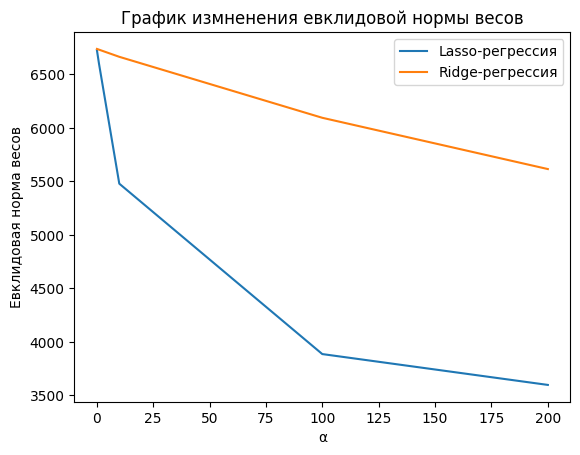

In [ ]:
# обучение Lasso- и Ridge-регрессий
alphas = [0.1, 1, 10, 100, 200]

lassos = [Lasso(alpha=alph).fit(X_train_scaled, y_train) for alph in alphas]
lasso_norms = [np.linalg.norm(ls.coef_) for ls in lassos]

ridges = [Ridge(alpha=alph).fit(X_train_scaled, y_train) for alph in alphas]
ridge_norms = [np.linalg.norm(rg.coef_) for rg in ridges]

# построение графика
plt.figure()
plt.title('График измненения евклидовой нормы весов')
plt.xlabel('α')
plt.ylabel('Евклидовая норма весов')
plt.plot(alphas, lasso_norms, label='Lasso-регрессия')
plt.plot(alphas, ridge_norms, label='Ridge-регрессия')
plt.legend()
plt.show()

Метод Lasso более агрессивно уменьшает веса, поскольку включает L1-регуляризацию, благодаря чему зануляется часть коэффициентов признаков.
Именно поэтому Lasso-регрессию часто используют для отбора признаков, т.к. она автоматически делает коэффициенты нулевыми при незначительных признаках, что упрощает модель и помогает избежать ее переобучения.

In [ ]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=alphas, cv=5).fit(X_train_scaled, y_train)
matrix_errors = lasso_cv.mse_path_
fin_alpha = lasso_cv.alphas_[np.argmin(np.mean(matrix_errors, axis=1))]

print("Оптимальное значение alpha:", fin_alpha)

Оптимальное значение alpha: 1.0


In [ ]:
# итоговая Lasso-регрессия
fin_lasso = Lasso(alpha=fin_alpha).fit(X_train_scaled, y_train)

# полученные коэффициенты
coefs = [(name, coeff) for (name, coeff) in zip(X_train.columns, fin_lasso.coef_)]
print(*coefs, sep='\n')

('carat', 5388.670208645402)
('depth', -87.20706896709342)
('table', -56.56913546336858)
('x', -1163.486233875401)
('y', -0.0)
('z', -45.010594648167995)
('cut_Good', 135.69450132385728)
('cut_Ideal', 364.29984305078193)
('cut_Premium', 288.00786388944954)
('cut_Very Good', 268.76696820333063)
('color_E', -73.6271049697311)
('color_F', -96.77005321457058)
('color_G', -190.7350302921025)
('color_H', -344.8694843012042)
('color_I', -436.8023837593843)
('color_J', -524.8427144618611)
('clarity_IF', 912.9499390202782)
('clarity_SI1', 1446.484431925694)
('clarity_SI2', 917.271150770886)
('clarity_VS1', 1547.8065510358267)
('clarity_VS2', 1673.187591605661)
('clarity_VVS1', 1192.3012434685975)
('clarity_VVS2', 1360.8463819068315)


Наиболее информативными оказались признаки 'carat' и 'clarity_VS2', 'clarity_VS1', 'clarity_SI1', т.к. количество карат и чистота бриллиантов влияют на ценность и стоимость бриллиантов больше прочих характеристик.

Наименее информативными оказались признаки 'color', т.к. цвет, видимо, не так важен для покупателей, и 'x' из-за мультиколлинеарности с 'carat'.

In [ ]:
print(f"Среднеквадратическая ошибка на тестовой выборке fin_lasso: {mean_squared_error(y_test, fin_lasso.predict(X_test_scaled))}")
print(f"Среднеквадратическая ошибка на тестовой выборке lr: {mean_squared_error(y_test, lr.predict(X_test_scaled))}")

Среднеквадратическая ошибка на тестовой выборке fin_lasso: 1200410.3141999177
Среднеквадратическая ошибка на тестовой выборке lr: 1203911.4853142365


Среднеквадратическая ошибка Lasso-регрессии меньше, чем ошибка обычной линейной регрессии, поэтому использовать Lasso-регрессии будет лучше для предсказаний.

Возможно, это связано с тем, что Lasso-регрессия хорошо работает, когда признаков много и большая часть из них мало влияет на целевую переменную (как в нашем случае). Кроме того, как упомяналось в задании 3.9, Lasso-регрессию зануляет коэффициенты при незначительности признаков, что упрощает модель и помогает избежать ее переобучения.